In [134]:
import pylab
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy
from qutip import *
from scipy import linalg
plt.style.use('bmh')
from two3levelHamiltonian import *
from nndist import *

#Code about two three-level atoms

def ind(i,j, dim):
    #map of i and j into a single index, runs through columns first, and rows second
    return i*dim + j

t = np.linspace(0., 400., 2000.)  #vector for time evolution

#Delta_1 = 0.0001
Delta_2 = 0
Omeg_1 = 1.
#coupling from g to e
Omeg_2 = 2.    #coupling from e to r
gamma_eg = 1. #decay from e to g
gamma_re = 0.000  #decay from r to e
gamma_rg = 0.0  #decay r to g
gamma_egcol = 0.0  #collective decay, e to g
V = 0.05*10**6. #constant characterizing the dipole interaction strength

rho = 1/1000. #density of the medium

dim = 3 #three-level system
idx = range(dim)  #vector, goes from to 0 to dim-1

kets_1atom = qutrit_basis(); #basis for a three-level system
bras_1atom = []
for i in idx:
    bras_1atom.append((kets_1atom[i]).dag()) #dual basis for one atom
     
#Sigma matrices for one atom only.
sig_1atom = []
for i in idx:
    for j in idx:
        sig_1atom.append(kets_1atom[i]*bras_1atom[j])

#Sigma matrices for the expanded space of 2 atoms
#The indices go from 1 to dim*dim. sig1[0] = sig1_gg; sig1[1] = sig1_ge, etc.
sig1 = []
sig2 = []
for sig_aux in sig_1atom:
    sig1.append(tensor(sig_aux, identity(dim)))
    sig2.append(tensor(identity(dim), sig_aux))


trace = []

pop_r = []
pop_rr = []

coherence = []

#operators whose expectation values are of interest
popinr = sig1[ind(2,2,dim)] + sig2[ind(2,2,dim)]
popine = sig1[ind(1,1,dim)] + sig2[ind(1,1,dim)]
poping = sig1[ind(0,0,dim)] + sig2[ind(0,0,dim)]
    
obs = sig1[ind(1,0,dim)] + sig2[ind(1,0,dim)]
    
popinrr = sig1[ind(2,2,dim)]*sig2[ind(2,2,dim)]

num_step = 200
step_x = 200
Delta1vec = np.linspace(-10.,10., num_step)
xvec = np.linspace(0.01, 25, step_x)
dx = (25. - 0.01)/(1.*step_x)


paveraged_e = []
paveraged_r = []  

p_e_Vequals0 = []

for Delta_1 in Delta1vec:
    pop_e = []
    pop_r = []
    for x in xvec:
        Vdip = V/(x**6.)
        H = Hamiltonian(Delta_1, Delta_2, Omeg_1, Omeg_2, Vdip)
        Heff = Hamiltonianeff(Delta_1, Delta_2, Omeg_1, Omeg_2, Vdip)
        decay_ops = decay(gamma_eg, gamma_re, gamma_rg, gamma_egcol)

      #  psi0 = tensor(kets_1atom[0], kets_1atom[0]) #initial state

        rho_ss = steadystate(H, decay_ops, method = 'svd'); #steady state, given H and decay_ops

        pop_e.append((rho_ss*popine).tr())  #population in e, as a function of x, for a given Delta_2
        pop_r.append((rho_ss*popinr).tr())

    #Now calculate integral of pop_e (x)  *nndist (x) delta x
    
    paveraged_e.append(dx*np.inner(np.asarray(pop_e), nndist(xvec, rho)))
    #paveraged_r.append(dx*np.inner(np.asarray(pop_r), nndist(xvec, rho)))

for Delta_1 in Delta1vec:    
    H = Hamiltonian(Delta_1, Delta_2, Omeg_1, Omeg_2, 0)
    decay_ops = decay(gamma_eg, gamma_re, gamma_rg, gamma_egcol)
    rho_ss = steadystate(H, decay_ops, method = 'svd'); #steady state, given H and decay_ops
    p_e_Vequals0.append((rho_ss*popine).tr())  #population in e, as a function of x, for a given Delta_2
       # pop_r.append((rho_ss*popinr).tr())

#vector_ones = np.ones(len(nndist(xvec, rho)))    
        

    
#result = mesolve(H, psi0, t, decay_ops, [exp1, exp2,exp3,exp4])

#plt.figure()
#plt.plot(Delta1vec, trace, '-', color = 'blue')

#plt.figure()
#plt.plot(Delta1vec, paveraged_r, '-')


plt.figure()
plt.subplot(facecolor='white')
plt.plot(Delta1vec, paveraged_e, '-', color='red')
plt.plot(Delta1vec, p_e_Vequals0, '--', label="no interaction", color='gray')
plt.xlabel(r"$\Delta_1$")
plt.ylabel(r"$f(\Delta_1)$")
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("fluorescenceantiblockade.pdf")





/Users/hudsonps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/hudsonps/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [136]:
C6 = 0.05*10**6


rho_0 = 0.001

r_max = (1/(2*np.pi*rho_0))**(1/3.)

plt.figure()
ax1 = plt.subplot(facecolor='white')
mpl.rcParams.update({'font.size': 16})



y_cut = np.linspace(0,100,1000)
r_cut_off = np.exp(0*y_cut)*(C6/30)**(1/6)




dist = np.linspace(0.0001,15,1000)
W = nndist(dist, rho_0)
Vdip = C6/(dist**6.)

ax1.plot(dist, W, color='b')
ax1.set_xlabel(r"$r$")
ax1.set_ylabel(r"$W(r)$", color='blue')
ax1.tick_params('y', colors='blue')
plt.text(s=r"$n_0 = 10^{-3}$",  x = 10, y = 0.15)

ax2 = ax1.twinx()
ax2.set_ylim(-0.1,100)
ax2.plot(dist, Vdip, color='red')
ax2.plot(r_cut_off, y_cut, color='gray', ls='--')
ax2.set_ylabel(r"$V_0 (r)$", color='r')
ax2.tick_params('y', colors='r')

plt.tight_layout()

#plt.ylabel(r"$W(r)$")



plt.savefig("nearestneighbour.pdf")
#plt.show()


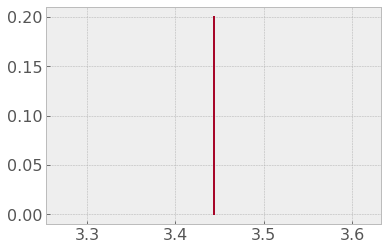

In [110]:
plt.plot(r_cut_off, y_cut)
plt.show()